In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train_df = pd.read_csv('Google_Stock_Price_Train.csv')
train_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
test_df = pd.read_csv('Google_Stock_Price_Test.csv')
test_df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [7]:
#choose open coln for predictions
train = train_df.loc[:,['Open']].values

In [9]:
train.shape

(1258, 1)

In [10]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
train_scaled = scaler.fit_transform(train)

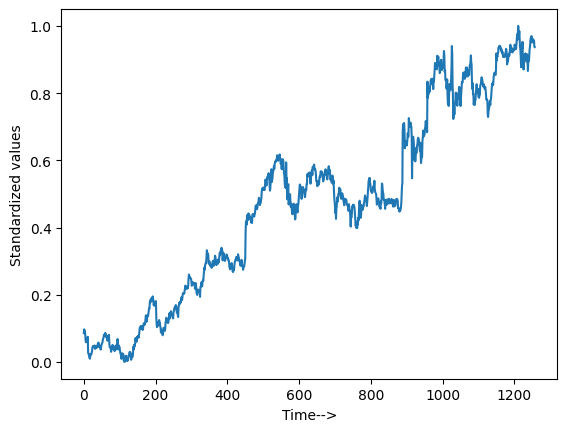

In [12]:
plt.plot(train_scaled)
plt.xlabel("Time-->")
plt.ylabel("Standardized values")
plt.show()

In [14]:
#create a data structure to train model:
x_train = []
y_train = []
time = 60
for i in range(60,train_scaled.shape[0]):
    x_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

In [15]:
x_train.shape,y_train.shape

((1198, 60), (1198,))

In [16]:
x_train = np.reshape(x_train,newshape=(x_train.shape[0],x_train.shape[1],1))

In [17]:
x_train.shape

(1198, 60, 1)

In [20]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN,Dropout

In [22]:
model = Sequential()

model.add(SimpleRNN(units=50,activation="tanh",return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation="tanh",return_sequences=True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50,activation="tanh",return_sequences=True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer="adam", loss='mse')
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 50)            2600      
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 60, 50)            5050      
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 50)               

In [23]:
model.fit(x_train,y_train,epochs=100,batch_size=30,validation_split=0.5)

Epoch 1/100
20/20 [==============================] - 4s 70ms/step - loss: 0.4892 - val_loss: 0.1574
Epoch 2/100
20/20 [==============================] - 1s 59ms/step - loss: 0.3997 - val_loss: 0.2802
Epoch 3/100
20/20 [==============================] - 1s 62ms/step - loss: 0.2789 - val_loss: 0.0251
Epoch 4/100
20/20 [==============================] - 1s 70ms/step - loss: 0.2878 - val_loss: 0.0171
Epoch 5/100
20/20 [==============================] - 2s 82ms/step - loss: 0.2502 - val_loss: 0.0309
Epoch 6/100
20/20 [==============================] - 2s 77ms/step - loss: 0.1819 - val_loss: 0.0095
Epoch 7/100
20/20 [==============================] - 1s 72ms/step - loss: 0.1650 - val_loss: 0.0208
Epoch 8/100
20/20 [==============================] - 1s 69ms/step - loss: 0.1294 - val_loss: 0.0150
Epoch 9/100
20/20 [==============================] - 1s 76ms/step - loss: 0.1120 - val_loss: 0.0215
Epoch 10/100
20/20 [==============================] - 1s 66ms/step - loss: 0.1014 - val_loss: 0.0156

In [25]:
#prepare test data
data = pd.concat((train_df['Open'],test_df['Open']),axis=0)

In [27]:
test_input=data.iloc[len(data) - len(test_df)-time :].values
test_input.shape

(80,)

In [29]:
test_input = test_input.reshape(-1,1)
test_input.shape

(1, 1)

In [32]:
test_scaled = scaler.fit_transform(test_input)

In [36]:
#create test data
x_test = []
for i in range(time,test_scaled.shape[0]):
    x_test.append(test_scaled[i-time: i,0])
x_test = np.array(x_test)
x_test.shape


(20, 60)

In [37]:
#reshape 
x_test = np.reshape(x_test, newshape = (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(20, 60, 1)

In [38]:
y_test = test_df.loc[:,["Open"]].values

In [39]:
#model prediction
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 380ms/step


In [40]:
y_pred = scaler.inverse_transform(y_pred)

In [41]:
output = model.evaluate(x=x_test,y=y_test)

1/1 [==============================] - 0s 476ms/step - loss: 651361.0000


In [ ]:
plt.plot(y_test, color = 'red', label = 'Real Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Price')

plt.title("Sample")
